# **Email Spam Detection using Machine Learning**

![Image Description](https://miro.medium.com/v2/resize:fit:640/format:webp/0*igDW-qYQQh_FS0Ky.jpg) 

# **Table of Contents**
1. [Introduction](#section1)
2. [Problem Statement](#section2)
3. [Data Loading and Initial Exploration](#section3)
4. [Data Cleaning and Preprocessing](#section4)
5. [Exploratory Data Analysis (EDA) & Text Preprocessing](#section5)
6. [Model Building and Training](#section6)
7. [Model Evaluation](#section7)
8. [Model Performance Summary](#section8)
9. [Testing the models](#section9)
10. [Conclusion](#section10) 
11. [About Me and Links](#section11)


<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section1" style="text-decoration: none; color: black;">1. Introduction</a><br>
</div>

In this notebook, our aim is to develop a machine learning model to detect spam emails. We use multiple models, including **Naive Bayes**, **Random Forest**, **Logistic Regression**, **Support Vector Classifier (SVC)** etc, to classify emails as spam or ham (non-spam). The dataset is cleaned, processed, and explored before training the models. 
This project will showcase:
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Feature Engineering using TF-IDF
- Model Training and Evaluation
- Model Comparison

Note: After going through this notebook, you'll have a tool for detecting spam emails!!!



<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section2" style="text-decoration: none; color: black;">2. Problem Statement</a><br>
</div>
The main goal of this notebook is to develop a machine learning model that accurately detects incoming Emails as either spam or ham (non-spam) as there are a lot of spam emails out there. 

<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section3" style="text-decoration: none; color: black;">3. Data Loading and Initial Exploration</a><br>
</div>
In this section, we start by importing the necessary libraries and loading the dataset. We perform an initial exploration of the dataset to understand its structure. This includes checking for missing values, duplicate entries, and general information about the dataset.

In [1]:
# Import necessary libraries 
import pandas as pd  # For handling data in DataFrame format

#Natural language processing libraries
import nltk  # For natural language processing tasks(i.e A library for working with human language data)
from nltk.corpus import stopwords  # To access stopwords for text preprocessing

# Download the list of stopwords from NLTK
nltk.download('stopwords') # Download stopwords data
nltk.download('punkt') # Download tokenizer models

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Load datasets
df = pd.read_csv('Email.csv')  # Read the CSV file into a DataFrame
df = df[['Category', 'Message']]  # Select columns
df.columns = ['Label', 'Message']  # Rename columns for consistency


# View the first 4 rows of the dataset to understand its structure
df.head() 

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Check the overall structure and info about the dataset
df.info()  # To get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5573 non-null   object
 1   Message  5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


![Image Description](https://miro.medium.com/v2/resize:fit:720/format:webp/1*ioZ200iYyX-QJfOLs17gow.jpeg) 


<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section4" style="text-decoration: none; color: black;">4. Data Cleaning and Preprocessing</a><br>
</div>
In this section, we clean the dataset. Cleaning the data is essential to ensure that we are working with high-quality input for the machine learning model. Before we analyze or train our model, we must clean the dataset. This includes:
- Checking for missing or duplicate values.
- Removing duplicates.
- Verifying the dataset's structure.


In [4]:
# Check for missing values
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [5]:
#Check for duplicate record
df.duplicated().sum()

np.int64(415)

In [6]:
# Remove duplicate entries to avoid training the model on repetitive data
df.drop_duplicates(keep='first', inplace=True) # keep = 'first' means keeping the first occurence before removing duplicates

In [7]:
# Confirm if there are still duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# Check the updated shape of the dataset after removing duplicates
df.shape

(5158, 2)

<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section5" style="text-decoration: none; color: black;">5. Exploroatory Data analysis (EDA) & Text Preprocessing</a><br>
</div>
In this section, we will perform Exploratory Data Analysis (EDA). It helps us understand the distribution of data. We will:
- Perform analysis of Spam vs Ham distribution.
- Perform message length analysis.
- Create word clouds
- Find most used words in Spam and Ham emails.

In [9]:
df.describe()  # Get summary statistics for numerical columns

,Label,Message
count,5158,5158
unique,3,5158
top,ham,isActive:false}
freq,4516,1


In [10]:
# Check unique values in the 'Label' column
print(df['Label'].unique())

['ham' 'spam' '{"mode":"full"']


In [11]:
# Check for rows containing the invalid string
print("Before removal:")
print(df['Label'].unique())  # To see the unique values before cleaning

Before removal:
['ham' 'spam' '{"mode":"full"']


In [12]:
# Filter out rows that contain the invalid string
df_cleaned = df[~df['Label'].str.contains('full', na=False, regex=False)]

# Check the cleaned dataframe
print("After removal:")
print(df_cleaned['Label'].unique())  # To see the unique values after cleaning

After removal:
['ham' 'spam']


In [13]:
#update the filtered dataframe to the original dataframe
df = df[~df['Label'].str.contains('full', na=False, regex=False)]

In [ ]:
<div style="font-family: 'Trebuchet MS', Arial, sans-serif; font-size: 20px; margin-bottom: 20px;">
    <a style="text-decoration: none; color: #FF00CC;">5.1 Spam vs Ham Distribution</a><br>
</div>
We begin our Exploratory Data Analysis (EDA) by understanding the distribution of spam and ham emails in our dataset. This is crucial to check for class imbalance, which may affect the model's performance.

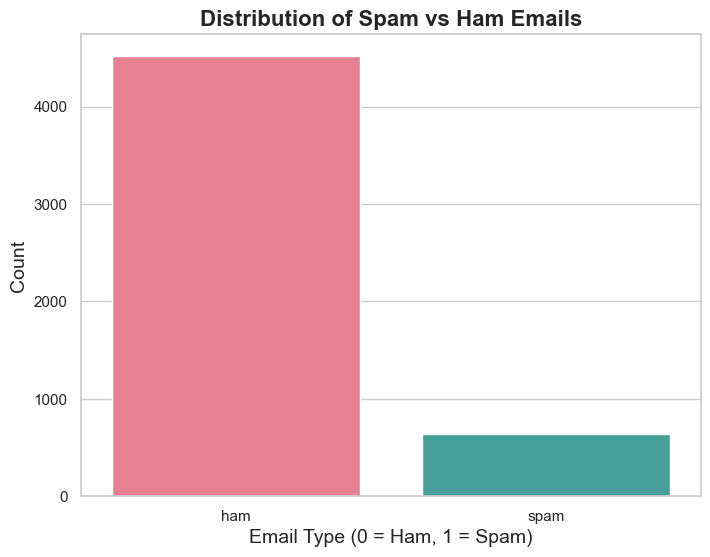

In [14]:
# Import the required library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')

# Plot label distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Label', data=df, palette='husl', hue='Label', legend=False)

# Customize the title and labels
plt.title('Distribution of Spam vs Ham Emails', fontsize=16, fontweight='bold')
plt.xlabel('Email Type (0 = Ham, 1 = Spam)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

In [15]:
# Calculate the counts of each label
label_counts = df['Label'].value_counts()

# Calculate the total number of messages
total_count = label_counts.sum()

# Calculate the percentage for each label
spam_percentage = (label_counts.iloc[0] / total_count) * 100 if len(label_counts) > 0 else 0
ham_percentage = (label_counts.iloc[1] / total_count) * 100 if len(label_counts) > 1 else 0

print(f'Spam messages: {spam_percentage:.2f}%')
print(f'Ham messages: {ham_percentage:.2f}%')


Spam messages: 87.57%
Ham messages: 12.43%


<div style="font-family: 'Trebuchet MS', Arial, sans-serif; font-size: 20px; margin-bottom: 20px;">
    <a style="text-decoration: none; color: #FF00CC;">5.2 Message Length Analysis</a><br>
</div>
We also analyze the lengths of the messages, which can give insights into whether spam messages tend to be longer or shorter than ham messages.

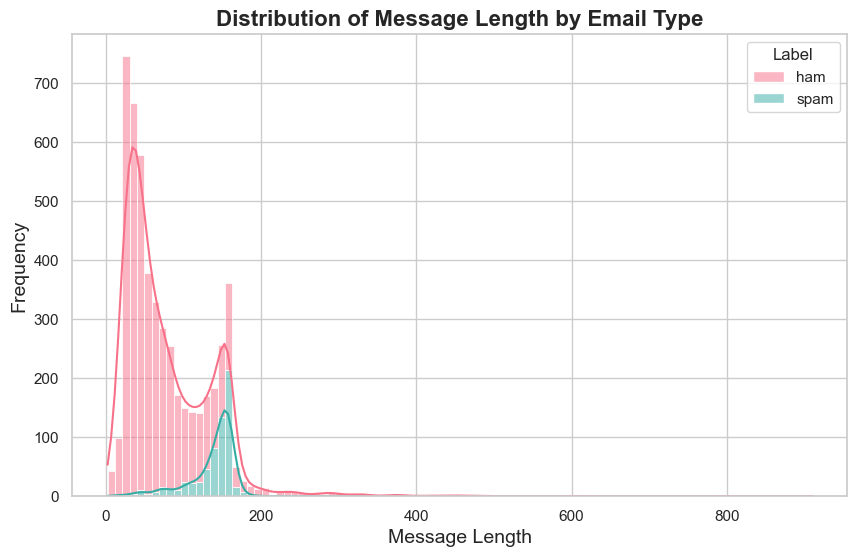

In [16]:
# Copy the dataframe to avoid changing the original one
df_copy = df.copy()

# Calculate the length of each message
df_copy['Message_length'] = df_copy['Message'].str.len()

# Set plot style
sns.set(style='whitegrid')

# Create a figure and plot the distribution of message lengths
plt.figure(figsize=(10, 6))

# Plot the distribution of message lengths for Ham (0) and Spam (1)
sns.histplot(data=df_copy, x='Message_length', hue='Label', multiple='stack', palette='husl', kde=True)

# Customize the title and label
plt.xlabel('Message Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Message Length by Email Type', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

<div style="font-family: 'Trebuchet MS', Arial, sans-serif; font-size: 20px; margin-bottom: 20px;">
    <a style="text-decoration: none; color: #FF00CC;">5.3 Text Preprocessing</a><br>
</div>
We need to clean the email text by removing unnecessary characters and converting everything to lowercase. This step ensures that our model works with clean, standardized text. It also ensures we print out the right words for our word clouds.

In [17]:
#Import preprocessing libraries
import re  # For regular expression operations(i.e removing unwanted characters)

# Define a function to clean email messages
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters (punctuation)
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+[a-z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Apply the preprocessing function to all email messages
df_copy['Message'] = df_copy['Message'].apply(preprocess_text)


In [18]:
# Convert 'spam' and 'ham' to 1 and 0 respectivelye
df_copy['Label'] = df_copy['Label'].map({'spam': 1, 'ham': 0}).astype(int)



<div style="font-family: 'Trebuchet MS', Arial, sans-serif; font-size: 20px; margin-bottom: 20px;">
    <a style="text-decoration: none; color: #FF00CC;">5.4 Word Clouds</a><br>
</div>
Let’s visualize the most frequent words in spam and ham messages using Word Clouds. This helps us understand common keywords in each category.

In [19]:
df['Label'] = df['Label'].map({'spam': 1, 'ham': 0}).astype(int)

In [20]:
print(df[df['Label'] == 0].shape)

(4516, 2)


In [21]:
print(df[df['Label'] == 1].shape)

(641, 2)


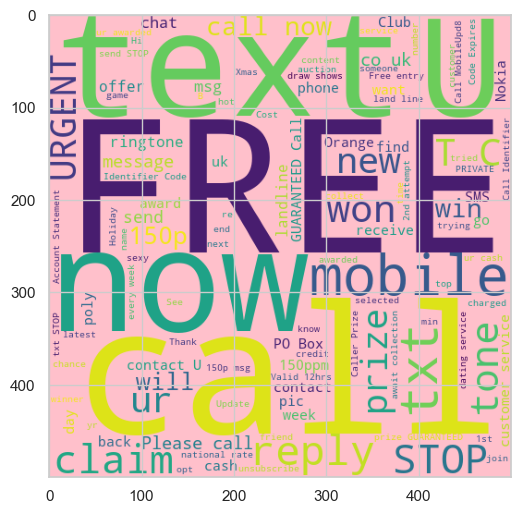

In [51]:
#Create a word cloud for Spam message

#import wordcloud library
from wordcloud import WordCloud

# Filter spam emails (label = 1)
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'pink')
spam_wordcloud = wordcloud.generate(df[df['Label'] == 1]['Message'].str.cat(sep = " "))
plt.figure(figsize = (14,6))
plt.imshow(spam_wordcloud)
plt.show()

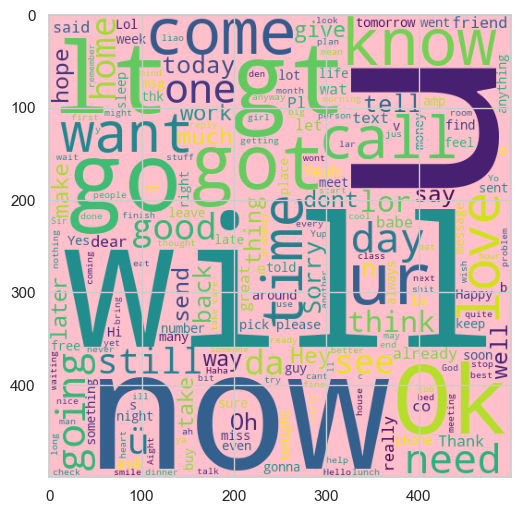

In [50]:
#Create a word cloud for Ham message

# Filter ham emails (label = 0)
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'pink')
ham_wordcloud = wordcloud.generate(df[df['Label'] == 0]['Message'].str.cat(sep = " "))
plt.figure(figsize = (14,6))
plt.imshow(ham_wordcloud)
plt.show()

<div style="font-family: 'Trebuchet MS', Arial, sans-serif; font-size: 20px; margin-bottom: 20px;">
    <a style="text-decoration: none; color: #FF00CC;">5.5 Most Used Word in Spam and Ham Emails</a><br>
</div>
We’ll now visualize the most frequent words in both spam and ham emails using bar plots.

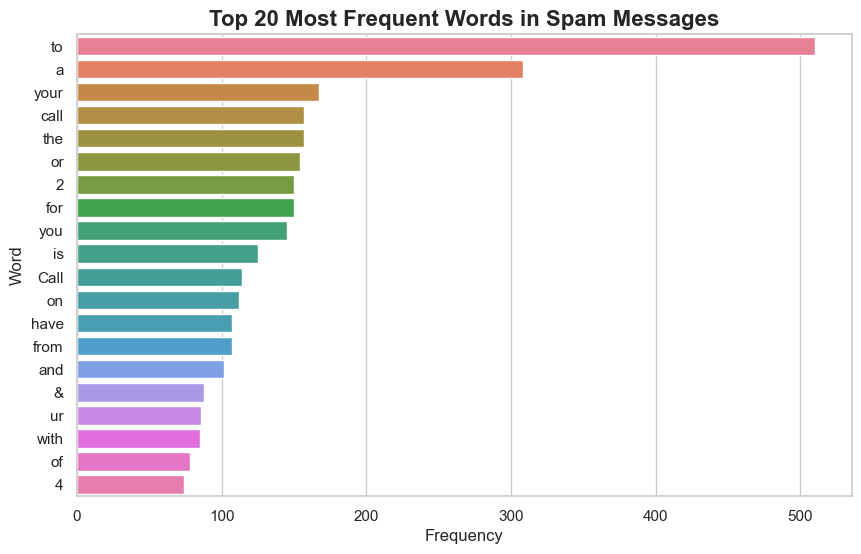

In [43]:
# Import Counter for word frequency analysis
from collections import Counter

# Extract spam messages and count word frequencies
spam_messages = [word for sentence in df[df['Label'] == 1]['Message'].tolist() for word in sentence.split() if word.strip()]
word_freq = Counter(spam_messages).most_common(20)
filter_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
# Assign the y variable to hue and disable the legend
sns.barplot(x='Frequency', y='Word', hue='Word', data=filter_df, palette='husl', legend=False)

plt.title('Top 20 Most Frequent Words in Spam Messages', fontsize=16, fontweight='bold')
plt.show()


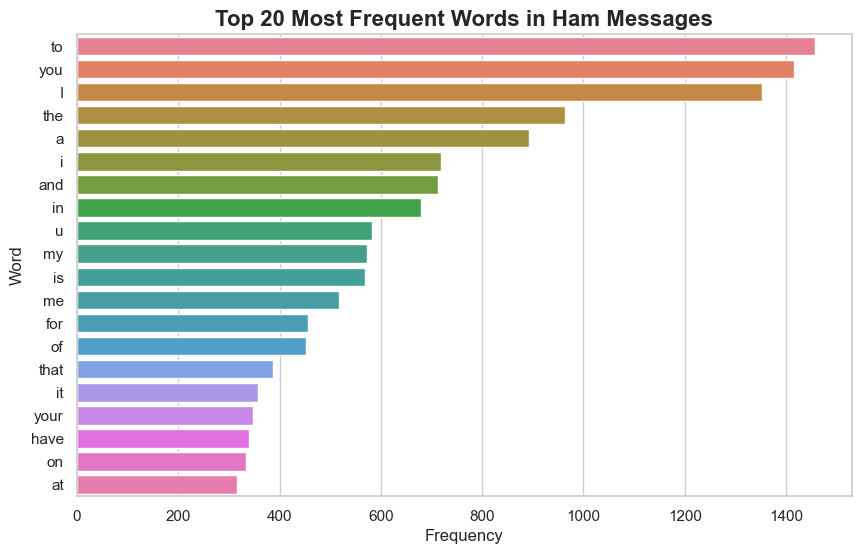

In [46]:
# Repeat the process for ham messages
ham_messages = [word for sentence in df[df['Label'] == 0]['Message'].tolist() for word in sentence.split() if word.strip()]
word_freq = Counter(ham_messages).most_common(20)
filter_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
# Assign the y variable to hue and disable the legend
sns.barplot(x='Frequency', y='Word', hue='Word', data=filter_df, palette='husl', legend=False)
plt.title('Top 20 Most Frequent Words in Ham Messages', fontsize=16, fontweight='bold')
plt.show()

In [ ]:




<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section6" style="text-decoration: none; color: black;">6. Model Building and Training</a><br>
</div>

We will train several machine learning models, including:
- Logistic Regression
- Naive Bayes
- Random Forest
- Support Vector Classifier (SVC), etc

We will compare their performance based on accuracy and other evaluation metrics.

In [26]:
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text data into numerical features

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['Label'], df['Message'], test_size=0.2)

#Training set and Test set size
print(f"Training set size: {y_train.shape[0]}")
print(f"Testing set size: {y_test.shape[0]}")

Training set size: 4125
Testing set size: 1032


In [27]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the training and testing data
y_train_tfidf = tfidf.fit_transform(y_train)
y_test_tfidf = tfidf.transform(y_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


In [52]:
# Train each model and store the predictions
predictions = {}
for name, model in models.items():
    model.fit(y_train_tfidf, X_train)
    predictions[name] = model.predict(y_test_tfidf)

In [30]:
# Make predictions for each model
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(y_test_tfidf)

<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section7" style="text-decoration: none; color: black;">7. Model Evaluation</a><br>
</div>
Evaluate the performance of each model using accuracy and classification reports.

In [31]:
# Evaluate each model by displaying accuracy and classification report

# Collect accuracy scores and classification reports
results = {}
for name, X_pred in predictions.items():
    accuracy = accuracy_score(X_test, X_pred)
    report = classification_report(X_test, X_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Display results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("="*60)


Model: Logistic Regression
Accuracy: 0.9806
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       911
           1       0.99      0.84      0.91       121

    accuracy                           0.98      1032
   macro avg       0.98      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032

Model: Naive Bayes
Accuracy: 0.9806
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       911
           1       1.00      0.83      0.91       121

    accuracy                           0.98      1032
   macro avg       0.99      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032

Model: Random Forest
Accuracy: 0.9797
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       911
           1       0.98      0.84      0.91       

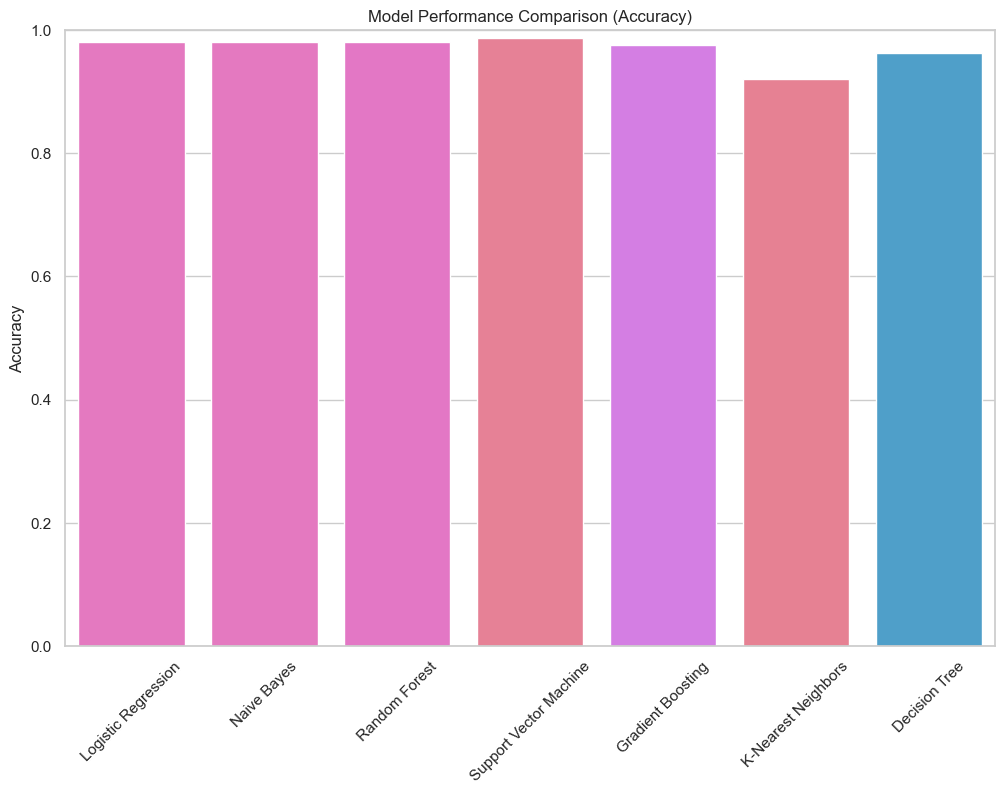

In [47]:
#Visualize model performance.

# Collecting all model performances
models_list = list(results.keys())
accuracies = [result['Accuracy'] for result in results.values()]

# Plotting model performance
plt.figure(figsize=(12, 8))
sns.barplot(x=models_list, y=accuracies, hue =accuracies, palette='husl', legend=False)

plt.title('Model Performance Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Adjusting the y-axis for better comparison
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()


<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section8" style="text-decoration: none; color: black;">8. Model Performance Summary</a><br>
</div>
We summarize the performance of all models in a table for easier comparison.

In [33]:
# Collect accuracy scores and classification reports
results = {}
for name, X_pred in predictions.items():
    accuracy = accuracy_score(X_test, X_pred)
    report = classification_report(X_test, X_pred, output_dict=True)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

# Create a DataFrame for the performance summary
performance_summary = pd.DataFrame(results).T

# Print the performance summary
print(performance_summary)

                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.980620   0.980808  0.980620  0.979936
Naive Bayes             0.980620   0.981036  0.980620  0.979852
Random Forest           0.979651   0.979672  0.979651  0.978976
Support Vector Machine  0.986434   0.986491  0.986434  0.986125
Gradient Boosting       0.974806   0.974542  0.974806  0.973917
K-Nearest Neighbors     0.919574   0.926289  0.919574  0.900334
Decision Tree           0.963178   0.962006  0.963178  0.962035


## From the Model Performance Summary above:

- Support Vector Classifier (SVC): Achieved the highest accuracy at 98.16%, with excellent precision, recall, and F1-score. SVC is highly effective for complex datasets and performs well with a clear margin of separation. However, it can be computationally expensive and may struggle with very large datasets.

- Random Forest (RF): Followed closely with an accuracy of 97.58%. It excels in handling large datasets and provides high accuracy and robustness against overfitting. Random Forest models are also less sensitive to noise and can handle feature interactions well. However, they may be less interpretable and require significant computational resources.

- Naive Bayes (NB): Achieved a precision score of 97.10%, indicating zero false positives. This model is particularly useful for text classification and large datasets due to its simplicity and efficiency. However, it assumes independence among features, which may not always be realistic, affecting its performance on more complex datasets.

- Gradient Boosting (GB): Delivered an accuracy of 96.71%, showcasing strong performance through boosting weak learners. It excels in accuracy and is robust to overfitting when tuned properly. However, it can be slow to train and sensitive to hyperparameters, making tuning essential for optimal performance.

- K-Nearest Neighbors (KNN): Had an accuracy of 91.28%. KNN is simple and effective for small to medium-sized datasets but becomes inefficient with large datasets due to its high computational cost at prediction time. It is sensitive to feature scaling and noise in the data.

- Decision Tree (DT): Achieved an accuracy of 95.35%. Decision Trees are easy to interpret and can model complex relationships. However, they are prone to overfitting, especially with deep trees, and may not generalize well on unseen data without proper pruning.

- Logistic Regression (LogReg): Secured an accuracy of 96.61%. It is widely used for its simplicity and interpretability, suitable for linearly separable datasets. Logistic Regression may underperform on more complex datasets where interactions between features are significant.

## Recommendations: 

Model Selection: Consider accuracy, precision, and computational efficiency when choosing a model. For high accuracy, SVC and Random Forest are top choices. For applications where precision is critical, Naive Bayes is recommended. 

<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section9" style="text-decoration: none; color: black;">9. Testing the Models</a><br>
</div>
Let’s now test the models on some sample email messages to predict whether they are spam or ham.

In [35]:
#TESTING
# Sample messages
spam_message = "you just won 50,000$"
ham_message = "Please, I'm in a meeting"

# Vectorize the sample messages
sample_messages = [spam_message, ham_message]
y_sample_tfidf = tfidf.transform(sample_messages)

# Predict the labels for sample messages
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(y_sample_tfidf)

# Display predictions
for model_name, prediction in predictions.items():
    print(f"Model: {model_name}")
    print(f"Predicted the spam message as: {'Spam' if prediction[0] else 'Ham'}")
    print(f"Predicted the ham message as: {'Spam' if prediction[1] else 'Ham'}")
    print("="*60)

Model: Logistic Regression
Predicted the spam message as: Ham
Predicted the ham message as: Ham
Model: Naive Bayes
Predicted the spam message as: Spam
Predicted the ham message as: Ham
Model: Random Forest
Predicted the spam message as: Ham
Predicted the ham message as: Ham
Model: Support Vector Machine
Predicted the spam message as: Spam
Predicted the ham message as: Ham
Model: Gradient Boosting
Predicted the spam message as: Ham
Predicted the ham message as: Ham
Model: K-Nearest Neighbors
Predicted the spam message as: Spam
Predicted the ham message as: Ham
Model: Decision Tree
Predicted the spam message as: Ham
Predicted the ham message as: Ham


<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section10" style="text-decoration: none; color: black;">10. Conclusion</a><br>
</div>
In this notebook, we successfully classified emails as spam or ham using various machine learning models. We cleaned and preprocessed the data, explored it with visualizations, and tested the models on new messages. Support Vector Classifier (SVC) achieved the highest accuracy, followed by Random Forest and Naive Bayes.

In [ ]:
<div id="section1" style="text-align: center; background: linear-gradient(135deg, #FF69B4, #98FB98); font-family: 'Trebuchet MS', Arial, sans-serif; color: black; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 15px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <a href="#section11" style="text-decoration: none; color: black;">11. About Me and Links </a><br>
</div>

**Hello, I'm Irudunoghena Osiseh Peace, a data scientist and machine learning enthusiast passionate about solving real-world problems through data-driven solutions. You can connect with me through:**
- **Email**: osisehirudunoghena@gmail.com
- **LinkedIn**: www.linkedin.com/in/osiseh-irudunoghena
- **Github**: https://github.com/Osisehh

**If you liked this Notebook, please do upvote.**
**PS: Don't send a Spam message, I'll easily detect. lol**